In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from pandas import Series
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
df = pd.read_csv(r'C:\Users\User\I am learning ML\Red Wine Quality Prediction/winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
# separate the x-axis
X = df.iloc[:,0:11]
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [4]:
# separate the y-axis
Y = df.iloc[:,11]
Y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [5]:
arr=np.loadtxt("winequality-red.csv", delimiter=",",skiprows=1)
arr

array([[ 7.4  ,  0.7  ,  0.   , ...,  0.56 ,  9.4  ,  5.   ],
       [ 7.8  ,  0.88 ,  0.   , ...,  0.68 ,  9.8  ,  5.   ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  0.65 ,  9.8  ,  5.   ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  0.75 , 11.   ,  6.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  0.71 , 10.2  ,  5.   ],
       [ 6.   ,  0.31 ,  0.47 , ...,  0.66 , 11.   ,  6.   ]])

In [6]:
#separate the x and the y axes
# for the x-axis we want columns at index 0 to 10 of the array
X = arr[:,0:11]
# for the y-axis, we want columns at index 11 of the array
Y= arr[:,11]

In [7]:
print(X)
print(X.shape)

[[ 7.4    0.7    0.    ...  3.51   0.56   9.4  ]
 [ 7.8    0.88   0.    ...  3.2    0.68   9.8  ]
 [ 7.8    0.76   0.04  ...  3.26   0.65   9.8  ]
 ...
 [ 6.3    0.51   0.13  ...  3.42   0.75  11.   ]
 [ 5.9    0.645  0.12  ...  3.57   0.71  10.2  ]
 [ 6.     0.31   0.47  ...  3.39   0.66  11.   ]]
(1599, 11)


In [8]:
print(Y)

[5. 5. 5. ... 6. 5. 6.]


In [9]:
# reshape the x-axis
X=np.vstack((np.ones((X.shape[0], )),X.T)).T
print(X)
print(X.shape)

[[ 1.     7.4    0.7   ...  3.51   0.56   9.4  ]
 [ 1.     7.8    0.88  ...  3.2    0.68   9.8  ]
 [ 1.     7.8    0.76  ...  3.26   0.65   9.8  ]
 ...
 [ 1.     6.3    0.51  ...  3.42   0.75  11.   ]
 [ 1.     5.9    0.645 ...  3.57   0.71  10.2  ]
 [ 1.     6.     0.31  ...  3.39   0.66  11.   ]]
(1599, 12)


In [10]:
# reshape the y-axis into a vector
Y = arr[:,11].reshape(Y.size, 1)
print(Y)
print(Y.shape)

[[5.]
 [5.]
 [5.]
 ...
 [6.]
 [5.]
 [6.]]
(1599, 1)


In [11]:
# split the dataset into training set and testing set
XTrain, XTest, YTrain, YTest = train_test_split(X,Y, test_size=0.2, random_state = 1)

In [12]:
print(XTrain)
print(XTrain.shape)

[[ 1.     7.     0.65  ...  3.47   0.67   9.5  ]
 [ 1.    10.2    0.42  ...  3.04   0.63   9.6  ]
 [ 1.     5.2    0.34  ...  3.68   0.79  14.   ]
 ...
 [ 1.     6.6    0.725 ...  3.35   0.49  10.8  ]
 [ 1.     7.2    0.63  ...  3.37   0.58   9.   ]
 [ 1.     9.1    0.4   ...  3.21   0.69  12.5  ]]
(1279, 12)


In [13]:
print(YTrain)
print(YTrain.shape)

[[6.]
 [5.]
 [6.]
 ...
 [6.]
 [6.]
 [8.]]
(1279, 1)


In [14]:
print(XTest)
print(XTest.shape)

[[ 1.    8.8   0.41 ...  3.54  0.66 10.5 ]
 [ 1.    8.7   0.63 ...  3.26  0.63 10.2 ]
 [ 1.   10.4   0.34 ...  3.19  0.7  11.3 ]
 ...
 [ 1.    7.1   0.67 ...  3.44  0.54  9.4 ]
 [ 1.    6.2   0.39 ...  3.45  0.87 11.2 ]
 [ 1.   10.9   0.32 ...  3.28  0.77 11.5 ]]
(320, 12)


In [15]:
print(YTest)
print(YTest.shape)

[[5.]
 [6.]
 [6.]
 [6.]
 [6.]
 [6.]
 [6.]
 [5.]
 [5.]
 [5.]
 [6.]
 [6.]
 [6.]
 [6.]
 [6.]
 [5.]
 [6.]
 [5.]
 [5.]
 [5.]
 [6.]
 [6.]
 [5.]
 [6.]
 [6.]
 [6.]
 [6.]
 [6.]
 [6.]
 [7.]
 [6.]
 [6.]
 [5.]
 [6.]
 [5.]
 [6.]
 [5.]
 [7.]
 [6.]
 [5.]
 [6.]
 [5.]
 [5.]
 [6.]
 [5.]
 [6.]
 [5.]
 [5.]
 [5.]
 [6.]
 [5.]
 [4.]
 [7.]
 [5.]
 [5.]
 [6.]
 [6.]
 [6.]
 [5.]
 [5.]
 [5.]
 [6.]
 [5.]
 [6.]
 [5.]
 [6.]
 [7.]
 [6.]
 [6.]
 [6.]
 [5.]
 [6.]
 [6.]
 [6.]
 [5.]
 [5.]
 [6.]
 [6.]
 [5.]
 [6.]
 [5.]
 [5.]
 [5.]
 [6.]
 [5.]
 [5.]
 [5.]
 [7.]
 [5.]
 [6.]
 [5.]
 [7.]
 [5.]
 [6.]
 [5.]
 [5.]
 [6.]
 [5.]
 [3.]
 [6.]
 [5.]
 [5.]
 [5.]
 [5.]
 [5.]
 [5.]
 [6.]
 [6.]
 [5.]
 [6.]
 [7.]
 [5.]
 [6.]
 [6.]
 [5.]
 [7.]
 [5.]
 [5.]
 [5.]
 [5.]
 [4.]
 [7.]
 [7.]
 [5.]
 [5.]
 [5.]
 [6.]
 [5.]
 [7.]
 [7.]
 [6.]
 [5.]
 [7.]
 [5.]
 [6.]
 [7.]
 [5.]
 [7.]
 [6.]
 [6.]
 [5.]
 [6.]
 [6.]
 [5.]
 [6.]
 [6.]
 [6.]
 [5.]
 [6.]
 [6.]
 [6.]
 [6.]
 [5.]
 [6.]
 [5.]
 [7.]
 [5.]
 [6.]
 [6.]
 [6.]
 [8.]
 [6.]
 [5.]
 [5.]
 [6.]
 [6.]
 [4.

In [16]:
# # training the model
model=LinearRegression()
model.fit(XTrain,YTrain)
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [17]:
model.intercept_

array([40.44622602])

In [18]:
model.coef_
df=pd.DataFrame(model.coef_,index=['coefficients'],columns=['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_ioxide','density','pH','sulphates','alcohol','quality'])
df.T

,coefficients
fixed_acidity,0.000000
volatile_acidity,0.047962
citric_acid,-1.118401
residual_sugar,-0.276228
chlorides,0.020476
free_sulfur_dioxide,-1.768907
total_sulfur_ioxide,0.005350
density,-0.003449
pH,-36.710223
sulphates,-0.347701


In [19]:
# # # use the rsquared score to measure error in prediction
print(model.score(XTest,YTest))

0.3266402726986991


In [20]:
# make our prediction
ypred=model.predict(XTest)

In [21]:
ypred1=model.predict([[1,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.9962,3.41,0.39,10.9]])
ypred1

array([[5.40209195]])

In [22]:
# compare predicted values to the actual test values 
df=pd.DataFrame([[YTest,ypred]],columns=['Actual','Predicted'])
(df)

,Actual,Predicted
0,"[[5.0], [6.0], [6.0], [6.0], [6.0], [6.0], [6....","[[5.536655027492863], [5.375702797365854], [6...."


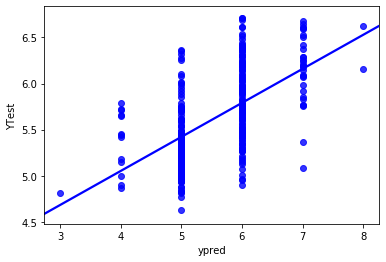

In [23]:
#plot how well the model is performing on a graph
plt.xlabel('ypred')
plt.ylabel('YTest')
sns.regplot(x=YTest,y=ypred,ci=None,color="b")

In [24]:
print('Mean Absolute Error:',metrics.mean_absolute_error(YTest,ypred))
print('Mean Squared Error:',metrics.mean_squared_error(YTest,ypred))
print('R Squared Error:',metrics.r2_score(YTest,ypred))

Mean Absolute Error: 0.4748298528762935
Mean Squared Error: 0.38307198158141875
R Squared Error: 0.3266402726986991
